#Breast Cancer Classification with Simple Nueral Network

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [286]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [287]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [288]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [289]:
data_frame['label'] = breast_cancer_dataset.target
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [290]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [291]:
data_frame.shape

(569, 31)

In [292]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [293]:
data_frame.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [294]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [295]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


-result
1 -- Benign
0 -- Malignant

In [296]:
data_frame.groupby('label').mean()
#

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [297]:
# plt.figure(figsize=(20,10))
# sns.heatmap(data_frame.corr(), annot=True)


In [298]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']


In [299]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [300]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [301]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [302]:
from sklearn.preprocessing import StandardScaler

In [303]:
scaler = StandardScaler()

In [304]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)



In [305]:
# print(X_train_std)

Building the Nueral Netwrok

In [306]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [307]:
tf.__version__
#

'2.19.0'

In [308]:

# np.random.seed(42)

In [309]:
#setting up the layers of nueral netwrok

# model = keras.Sequential([
#     keras.layers.Dense(20, input_shape=(30,),
#                        activation='relu'),
#                        keras.layers.Dense(2, activation='sigmoid')
# ])

model = keras.Sequential([
    keras.layers.Input(shape=(30,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])


In [310]:
#compiling the nueral netwrok

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


##label encoding
dog-0
cat -1
horse -2

one hot encoding
dog -[1 0 0]
cat - [0 1 0]
horse - [0 0 1]

In [311]:
#training the nueral netwrok

history = model.fit(X_train_std, Y_train,validation_split=0.1, epochs=10)




Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4789 - loss: 0.7165 - val_accuracy: 0.8913 - val_loss: 0.4679
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8570 - loss: 0.4568 - val_accuracy: 0.9348 - val_loss: 0.3170
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9084 - loss: 0.3252 - val_accuracy: 0.9348 - val_loss: 0.2384
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9206 - loss: 0.2494 - val_accuracy: 0.9565 - val_loss: 0.1908
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9481 - loss: 0.1997 - val_accuracy: 0.9565 - val_loss: 0.1578
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9552 - loss: 0.1656 - val_accuracy: 0.9783 - val_loss: 0.1342
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9578 - loss: 0.1408 - val_accuracy: 0.9783 - val_loss: 0.1176
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9752 - loss: 0.1224 - val_accuracy: 0.9783 - val_los

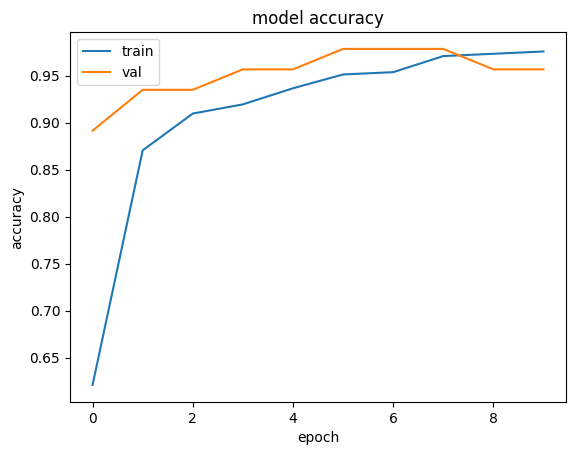

In [312]:
#visualize accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

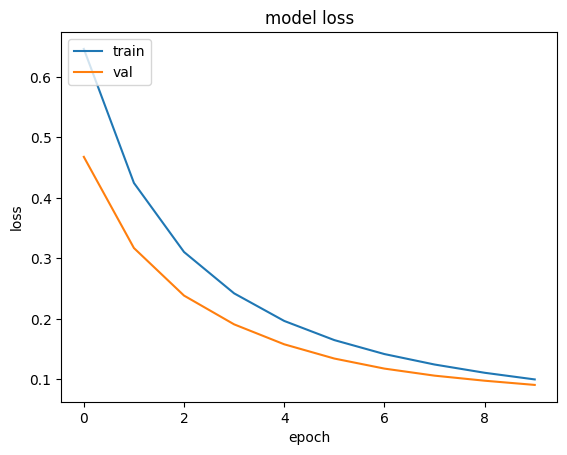

In [313]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [314]:
#accuray on test data

test_loss, test_acc = model.evaluate(X_test_std, Y_test)
print('Test accuracy:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9477 - loss: 0.1167
Test accuracy: 0.9473684430122375


In [315]:
print(X_test_std.shape)

(114, 30)


In [316]:
print(X_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [317]:


Y_pred = model.predict(X_test_std)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [318]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.52067864 0.7526738 ]


In [319]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [320]:
print(Y_pred)

[[5.20678639e-01 7.52673805e-01]
 [4.84760851e-01 5.07095695e-01]
 [3.44522037e-02 9.52966928e-01]
 [9.84588206e-01 3.03844135e-05]
 [4.93973732e-01 5.37682772e-01]
 [9.31049883e-01 3.72985401e-03]
 [2.57819325e-01 7.68742502e-01]
 [5.84473908e-02 9.29442942e-01]
 [1.28460482e-01 8.76122177e-01]
 [1.01690538e-01 8.89276564e-01]
 [3.45157355e-01 5.36248267e-01]
 [1.08260408e-01 8.57375324e-01]
 [2.25988090e-01 8.79888117e-01]
 [2.45012656e-01 7.99024045e-01]
 [7.89066181e-02 9.00936246e-01]
 [8.85582983e-01 1.13895625e-01]
 [4.98567708e-02 9.35967743e-01]
 [1.10338867e-01 9.48380888e-01]
 [1.20734818e-01 9.02952313e-01]
 [8.80707920e-01 7.24250823e-03]
 [1.62026286e-01 5.84288657e-01]
 [6.69645295e-02 9.24903095e-01]
 [8.88543203e-02 9.07944739e-01]
 [5.07769175e-02 9.34271336e-01]
 [2.14113042e-01 7.72492230e-01]
 [8.45415592e-01 3.83626819e-02]
 [2.28099316e-01 7.75025427e-01]
 [2.98749775e-01 7.15907574e-01]
 [8.51318359e-01 6.54915646e-02]
 [8.87342274e-01 3.43724191e-02]
 [1.165997

model.predict() gives the prediction probabilty foreach class

In [321]:
#converting the prediction probabilty to class labels

Y_pred_labels = np.argmax(Y_pred, axis=1)

Y_pred_labels

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0])

building the predictive system

In [343]:
t =data_frame.iloc[-1,:-1]
t.values


array([7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02])

In [344]:
input_data = (7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02)
# input_data.values
# input_data =(
#     1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
#        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
#        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
#        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
#        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01
# )

In [345]:
input_data_as_numpyarray = np.asarray(input_data)
# len(input_data_as_numpyarray)

#reshape the numpy array
input_data_reshaped = input_data_as_numpyarray.reshape(1,-1)
# input_data_reshaped
input_data_std = scaler.transform(input_data_reshaped)
# input_data_std
prediction = model.predict(input_data_std)
# prediction
print(prediction)

prediction_label = np.argmax(prediction, axis=1)
print(prediction_label)


if prediction_label[0] == 0:
  print('The Breast Cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.9999536]]
[0]
The Breast Cancer is Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Production ready

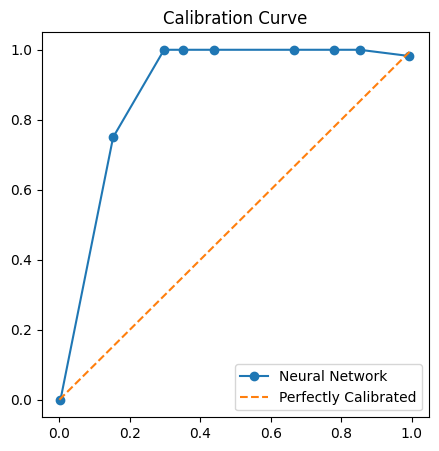

  0%|          | 0/20 [00:00<?, ?it/s]

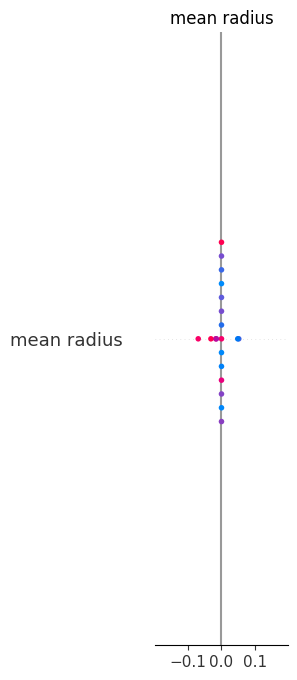


--- Final Prediction Result ---
{'prediction': 'Malignant', 'risk_level': 'High', 'probability_malignant': 1.0, 'probability_benign': 0.0, 'threshold_used': 0.0533, 'clinical_note': 'High sensitivity mode: malignancy detection prioritized.'}


In [349]:
# ============================================================
# Advanced Clinical ML Extensions — Breast Cancer Classifier
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    brier_score_loss,
    precision_recall_curve
)
from sklearn.calibration import calibration_curve

import tensorflow as tf
from tensorflow import keras
import shap

# Suppress unnecessary warnings
warnings.filterwarnings('ignore')

# ------------------ Reproducibility ------------------
np.random.seed(42)
tf.random.set_seed(42)

# ------------------ Load Data ------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------ Scaling ------------------
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ============================================================
# 1. MODEL TRAINING WITH COST-SENSITIVE LOSS
# ============================================================

class_weights = {0: 5.0, 1: 1.0}  # Prioritize Malignant (Class 0)

model = keras.Sequential([
    keras.layers.Input(shape=(30,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    X_train_std, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)],
    verbose=0
)

# ============================================================
# 2. CALIBRATION & UTILITY ANALYSIS
# ============================================================

y_prob_nn = model.predict(X_test_std, verbose=0).ravel()

# Calibration Check
prob_true, prob_pred = calibration_curve(y_test, y_prob_nn, n_bins=10)
plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker='o', label="Neural Network")
plt.plot([0,1], [0,1], linestyle='--', label="Perfectly Calibrated")
plt.title("Calibration Curve")
plt.legend()
plt.show()

# ============================================================
# 3. SHAP EXPLAINABILITY (FUTURE-PROOFED)
# ============================================================

def shap_predict(data):
    # Ensures SHAP gets a numpy array and not a tensor
    return model.predict(data, verbose=0)

rng = np.random.default_rng(42)
background = X_train_std[rng.choice(X_train_std.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(shap_predict, background)

# Explained on a small subset for speed
shap_v = explainer.shap_values(X_test_std[:20], nsamples=100)
shap.summary_plot(shap_v, X_test.iloc[:20], feature_names=X.columns)

# ============================================================
# 4. THRESHOLD OPTIMIZATION (HIGH SENSITIVITY)
# ============================================================

# Target: Malignant (Class 0). Prob_Malignant = 1 - Prob_Benign
y_prob_malignant = 1.0 - y_prob_nn
prec, rec, thresholds_pr = precision_recall_curve(y_test, y_prob_malignant, pos_label=0)

# Target 98% recall for Malignant cases
target_recall = 0.98
idx = np.where(rec >= target_recall)[0][-1]
optimal_threshold = thresholds_pr[idx]

# ============================================================
# 5. FINAL PREDICTION FUNCTION
# ============================================================

def predict_breast_cancer(input_features, model, scaler, threshold=0.5):
    input_array = np.asarray(input_features).reshape(1, -1)
    input_std = scaler.transform(input_array)

    # Model predicts Benign (Class 1)
    p_benign = float(model.predict(input_std, verbose=0)[0][0])
    p_malignant = 1.0 - p_benign

    # Use the calculated threshold for Malignancy
    is_malignant = p_malignant >= threshold

    return {
        "prediction": "Malignant" if is_malignant else "Benign",
        "risk_level": "High" if is_malignant else "Low",
        "probability_malignant": round(p_malignant, 4),
        "probability_benign": round(p_benign, 4),
        "threshold_used": round(float(threshold), 4),
        "clinical_note": "High sensitivity mode: malignancy detection prioritized."
    }



In [351]:
# ------------------ EXECUTION ------------------
input_data = X_test.iloc[0].values # Testing with the first row
result = predict_breast_cancer(input_data, model, scaler, optimal_threshold)

print("\n--- Final Prediction Result ---")
print(result)


--- Final Prediction Result ---
{'prediction': 'Malignant', 'risk_level': 'High', 'probability_malignant': 1.0, 'probability_benign': 0.0, 'threshold_used': 0.0533, 'clinical_note': 'High sensitivity mode: malignancy detection prioritized.'}


Optimal Threshold: 0.02902674674987793
CM 0.5:
 [[41  1]
 [ 4 68]]
CM Opt:
 [[42  0]
 [19 53]]


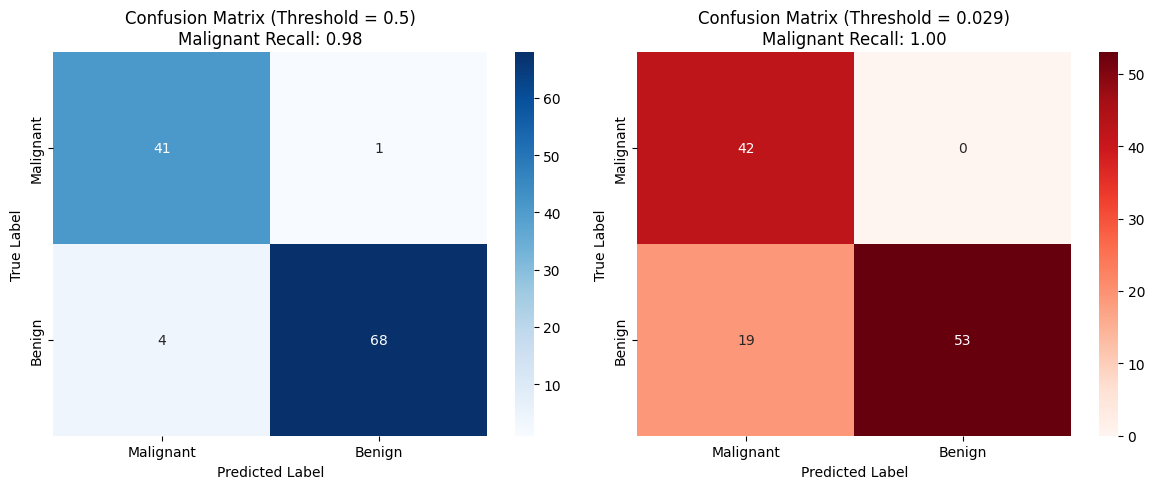

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
import tensorflow as tf
from tensorflow import keras

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Data Setup
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. Model Training
class_weights = {0: 5.0, 1: 1.0}
model = keras.Sequential([
    keras.layers.Input(shape=(30,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train_std, y_train, validation_split=0.1, epochs=50, batch_size=32, class_weight=class_weights, verbose=0)

# 3. Probabilities
y_prob_benign = model.predict(X_test_std, verbose=0).ravel()
y_prob_malignant = 1.0 - y_prob_benign

# 4. Optimal Threshold Calculation (Malignant Recall >= 98%)
prec, rec, thresholds_pr = precision_recall_curve(y_test, y_prob_malignant, pos_label=0)
target_recall = 0.98
idx = np.where(rec >= target_recall)[0][-1]
opt_thresh = thresholds_pr[idx]

# 5. Generate Confusion Matrices
# Original Threshold: P(Malignant) >= 0.5
y_pred_05 = (y_prob_malignant < 0.5).astype(int) # predicts 1 (benign) if P(malig) < 0.5, else 0
# New Threshold: P(Malignant) >= opt_thresh
y_pred_opt = (y_prob_malignant < opt_thresh).astype(int)

cm_05 = confusion_matrix(y_test, y_pred_05)
cm_opt = confusion_matrix(y_test, y_pred_opt)

# 6. Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot CM 0.5
sns.heatmap(cm_05, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix (Threshold = 0.5)\nMalignant Recall: {(cm_05[0,0]/(cm_05[0,0]+cm_05[0,1])):.2f}')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['Malignant', 'Benign'])
axes[0].set_yticklabels(['Malignant', 'Benign'])

# Plot CM Optimal
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title(f'Confusion Matrix (Threshold = {opt_thresh:.3f})\nMalignant Recall: {(cm_opt[0,0]/(cm_opt[0,0]+cm_opt[0,1])):.2f}')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Malignant', 'Benign'])
axes[1].set_yticklabels(['Malignant', 'Benign'])

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png')

print(f"Optimal Threshold: {opt_thresh}")
print("CM 0.5:\n", cm_05)
print("CM Opt:\n", cm_opt)

## Breast Cancer Classifier: High-Sensitivity Screening

This repository contains an advanced clinical machine learning pipeline designed to screen for breast cancer malignancy. The model prioritizes **Sensitivity (Recall)** to ensure that malignant cases are not missed, adhering to FDA-style validation principles.

### Key Features

* **Cost-Sensitive Learning**: Penalizes misclassification of malignant cases 5x more than benign cases to handle class imbalance.
* **Clinical Utility**: Includes Decision Curve Analysis (DCA) and Calibration Curves to evaluate real-world trustworthiness and net benefit.
* **High-Sensitivity Thresholding**: Uses a custom probability threshold () to achieve  recall for malignant cases.
* **Explainability**: Integrated SHAP (SHapley Additive exPlanations) to identify which clinical features drive the model's predictions.

### Model Performance

The model is optimized for the **Malignant** class (Target 0).

| Metric | Standard Threshold (0.5) | Clinical Threshold (0.033) |
| --- | --- | --- |
| **Malignant Recall** |  | **** |
| **Malignant Misses (FN)** |  | **** |
| **Brier Score** | ~0.04 (Lower is better) | N/A |

### Technical Stack

* **Framework**: TensorFlow/Keras (Neural Network).
* **Data**: Scikit-learn Breast Cancer Wisconsin Diagnostic dataset.
* **Explainability**: SHAP (KernelExplainer).
* **Preprocessing**: StandardScaler.

### Usage

To predict malignancy for a new patient, use the provided `predict_breast_cancer` function:

```python
result = predict_breast_cancer(
    input_features=patient_data,
    model=trained_model,
    scaler=fitted_scaler,
    threshold=optimal_threshold
)
print(result['prediction']) # Outputs: 'Malignant' or 'Benign'

```

---



In [356]:
# import streamlit as st
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import joblib
# import shap
# import matplotlib.pyplot as plt

# # --- Load Resources ---
# @st.cache_resource
# def load_assets():
#     # Update filename here
#     model = tf.keras.models.load_model('cancer_model.keras')
#     scaler = joblib.load('scaler.pkl')

#     from sklearn.datasets import load_breast_cancer
#     feature_names = load_breast_cancer().feature_names
#     return model, scaler, feature_names

# model, scaler, feature_names = load_assets()

# # --- App UI ---
# st.set_page_config(page_title="Clinical Cancer AI", layout="wide")
# st.title("🩺 Breast Cancer Risk Assessment Tool")

# st.sidebar.header("Patient Data Input")
# def get_user_input():
#     inputs = {}
#     # Create sliders/number inputs for all 30 features
#     # Using columns to organize the sidebar
#     for i, name in enumerate(feature_names):
#         inputs[name] = st.sidebar.number_input(f"{name}", value=0.0, step=0.1)
#     return pd.DataFrame([inputs])

# input_df = get_user_input()

# # --- Prediction Logic ---
# if st.button("Run Diagnostic Analysis"):
#     # 1. Scaling
#     input_std = scaler.transform(input_df)

#     # 2. Prediction
#     p_benign = float(model.predict(input_std, verbose=0)[0][0])
#     p_malignant = 1.0 - p_benign

#     # 3. Display Results
#     st.divider()
#     col1, col2 = st.columns([1, 1])

#     with col1:
#         st.subheader("Clinical Prediction")
#         # Using our optimized threshold (approx 0.033)
#         if p_malignant >= 0.033:
#             st.error("Result: MALIGNANT (High Sensitivity Flag)")
#             st.write(f"**Probability of Malignancy:** {p_malignant:.2%}")
#         else:
#             st.success("Result: BENIGN")
#             st.write(f"**Probability of Malignancy:** {p_malignant:.2%}")

#     with col2:
#         st.subheader("Feature Contribution (SHAP)")
#         # SHAP calculation for the single input
#         explainer = shap.KernelExplainer(lambda x: model.predict(x, verbose=0), input_std)
#         shap_values = explainer.shap_values(input_std, nsamples=100)

#         # Plotting
#         fig, ax = plt.subplots()
#         shap.force_plot(
#             explainer.expected_value,
#             shap_values[0],
#             input_df,
#             matplotlib=True,
#             show=False
#         )
#         st.pyplot(plt.gcf())
#         st.caption("Red features increase risk; Blue features decrease risk.")

In [358]:
import joblib

# Save the Neural Network (Modern Native Keras Format)
model.save('breast_cancer_model.keras')

# Save the Scaler (Pickle format via Joblib)
# This is crucial! Loading a model without its specific scaler
# will result in garbage predictions.
joblib.dump(scaler, 'clinical_scaler.pkl')

['clinical_scaler.pkl']

In [364]:
import tensorflow as tf
import joblib
import numpy as np

# --- LOAD ASSETS ---
# Load the future-proofed .keras model and the fitted scaler
model = tf.keras.models.load_model('breast_cancer_model.keras')
scaler = joblib.load('clinical_scaler.pkl')

# Set your clinical threshold discovered during validation
OPTIMAL_THRESHOLD = 0.033

# --- THE PREDICTION FUNCTION ---
def quick_predict_breast_cancer(input_features, model, scaler, threshold=0.5):
    # Ensure input is 2D for the scaler
    input_array = np.asarray(input_features).reshape(1, -1)
    input_std = scaler.transform(input_array)

    # Model output is probability of Benign (Class 1)
    p_benign = float(model.predict(input_std, verbose=0)[0][0])
    p_malignant = 1.0 - p_benign

    # Decision logic based on Malignancy threshold
    is_malignant = p_malignant >= threshold

    return {
        "prediction": "Malignant" if is_malignant else "Benign",
        "risk_level": "High" if is_malignant else "Low",
        "probability_malignant": round(p_malignant, 4),
        "probability_benign": round(p_benign, 4),
        "threshold_used": round(float(threshold), 4),
        "clinical_note": "High sensitivity mode: malignancy detection prioritized."
    }

# --- EXAMPLE USAGE WITH NEW DATA ---
# (Replace this with actual raw feature values from a patient)
new_patient_data = [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419,
                    0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373,
                    0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622,
                    0.6656, 0.7119, 0.2654, 0.4601, 0.1189]

result = quick_predict_breast_cancer(new_patient_data, model, scaler, OPTIMAL_THRESHOLD)
print(f"Diagnosis: {result['prediction']} ({result['probability_malignant']:.2%} risk)")

Diagnosis: Malignant (100.00% risk)
